In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import cm
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/agorina/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/agorina/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/agorina/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
umdf1 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table1.csv')
umdf2 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table2.csv')
umdf3 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table3.csv')
umdf4 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table4.csv')
umdf6 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table6.csv')
umdf7 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table7.csv')
umdf9 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table9.csv')
umdf10 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table10.csv')
umdf11 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table11.csv')
umdf12 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table12.csv')
umdf13 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table13.csv')
umdf14 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table14.csv')
umdf15 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table15.csv')
umdf16 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table16.csv')
umdf17 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table17.csv')
umdf18 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table18.csv')
umdf19 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table19.csv')
umdf20 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table20.csv')
umdf21 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table21.csv')
umdf22 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table22.csv')
umdf23 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table23.csv')
umdf24 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table24.csv')
umdf25 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table25.csv')
umdf26 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table26.csv')
umdf27 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table27.csv')
umdf28 = pd.read_csv('/Users/agorina/Desktop/Final/skincare_user_table28.csv')

In [6]:
frames1 = [umdf1, umdf2, umdf3, umdf4, umdf6, umdf7, umdf9, umdf10, umdf11, umdf12, umdf13, umdf14, umdf15, umdf16, umdf17, umdf18, umdf19, umdf20, umdf21, umdf22, umdf23, umdf24, umdf25, umdf26, umdf27, umdf28]
umdf = pd.concat(frames1, ignore_index=True)
umdf.head()

,Unnamed: 0,User,Rating,Review,Product_Url
0,0,allyp3\nEye Color Brown\nHair color Brunette\n...,5 stars,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,1,PatTea\nEye Color Brown\nHair color Red\nSkin ...,1 star,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,2,Sabi1991\nSephora employee\nEye Color Green\nH...,5 stars,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,3,happyface2\nEye Color Blue\nHair color Blonde\...,5 stars,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,4,kimkix34\nEye Color Green\nHair color Blonde\n...,5 stars,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...


In [7]:
umdf.shape

(5064, 5)

In [9]:

umdf.drop('Unnamed: 0', axis=1, inplace=True)

In [10]:
ucdf1 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table1.csv')
ucdf2 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table2.csv')
ucdf3 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table3.csv')
ucdf4 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table4.csv')
ucdf5 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table5.csv')
ucdf6 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table6.csv')
ucdf7 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table7.csv')
ucdf8 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table8.csv')
ucdf9 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table9.csv')
ucdf10 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table10.csv')
ucdf11 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table11.csv')
ucdf12 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table12.csv')
ucdf13 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table13.csv')
ucdf14 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table14.csv')
ucdf15 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table15.csv')
ucdf16 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table16.csv')
ucdf17 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table17.csv')
ucdf18 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table18.csv')
ucdf19 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table19.csv')
ucdf20 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table20.csv')
ucdf21 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table21.csv')
ucdf22 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table22.csv')
ucdf23 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table23.csv')
ucdf24 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table24.csv')
ucdf25 = pd.read_csv('/Users/agorina/Desktop/Final/cleansers_user_table25.csv')

In [12]:
frames2 = [ucdf1, ucdf2, ucdf3, ucdf4, ucdf5, ucdf6, ucdf7, ucdf8, ucdf9, ucdf10, ucdf11, ucdf12, ucdf13, ucdf14, ucdf15, ucdf16, ucdf17, ucdf18, ucdf19, ucdf20, ucdf21, ucdf22, ucdf23, ucdf24, ucdf25]
ucdf = pd.concat(frames2, ignore_index=True)
ucdf.drop('Unnamed: 0', axis=1, inplace=True)
ucdf.head()

,User,Rating,Review,Product_Url
0,allyp3\nEye Color Brown\nHair color Brunette\n...,5 stars,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea\nEye Color Brown\nHair color Red\nSkin ...,1 star,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991\nSephora employee\nEye Color Green\nH...,5 stars,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2\nEye Color Blue\nHair color Blonde\...,5 stars,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34\nEye Color Green\nHair color Blonde\n...,5 stars,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...


In [13]:
utdf1 = pd.read_csv('/Users/agorina/Desktop/Final/treatments_user_table1.csv')
utdf2 = pd.read_csv('/Users/agorina/Desktop/Final/treatments_user_table2.csv')
frames3 = [utdf1, utdf2]
utdf = pd.concat(frames3, ignore_index=True)
utdf.drop('Unnamed: 0', axis=1, inplace=True)
utdf.head()

,User,Rating,Review,Product_Url
0,MistressMuhdee\nAge over 54\nEye Color Blue\nH...,5 stars,Oh. My. Fat. Little. Baby Gosh!!! Every Christ...,https://www.sephora.com/product/liquid-gold-wi...
1,awf1160\nEye Color Blue\nHair color Brunette\n...,5 stars,I bought this product about 3 weeks ago. I don...,https://www.sephora.com/product/liquid-gold-wi...
2,richiefbaby\nEye Color Brown\nSkin Tone Tan\nS...,1 star,This product is gross... I thought this was a ...,https://www.sephora.com/product/liquid-gold-wi...
3,Envynoone\nEye Color Blue\nHair color Brunette...,5 stars,I am obsessed with skincare. I have used tons ...,https://www.sephora.com/product/liquid-gold-wi...
4,Leica2021\nEye Color Brown\nHair color Black\n...,5 stars,I LOVE this product! I have over 15 different ...,https://www.sephora.com/product/liquid-gold-wi...


In [14]:
umdf.to_csv('/Users/agorina/Desktop/Final/Moisturisers_Users.csv')
ucdf.to_csv('/Users/agorina/Desktop/Final/Cleansers_Users.csv')
utdf.to_csv('/Users/agorina/Desktop/Final/Treatments_Users.csv')

In [16]:
frames4 = [umdf, ucdf, utdf]
udf = pd.concat(frames4, ignore_index=True)
udf.head()

,User,Rating,Review,Product_Url
0,allyp3\nEye Color Brown\nHair color Brunette\n...,5 stars,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea\nEye Color Brown\nHair color Red\nSkin ...,1 star,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991\nSephora employee\nEye Color Green\nH...,5 stars,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2\nEye Color Blue\nHair color Blonde\...,5 stars,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34\nEye Color Green\nHair color Blonde\n...,5 stars,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...


In [17]:
udf.shape

(17001, 4)

In [18]:
udf.to_csv('/Users/agorina/Desktop/Final/All_Users.csv')

# ---------------Day 2 Cleaning and FE-----------------

In [5]:
udf = pd.read_csv('/Users/agorina/Desktop/Final/All_Users.csv')
udf.drop(columns =["Unnamed: 0"], inplace = True) 

udf.head()

,User,Rating,Review,Product_Url
0,allyp3\nEye Color Brown\nHair color Brunette\n...,5 stars,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea\nEye Color Brown\nHair color Red\nSkin ...,1 star,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991\nSephora employee\nEye Color Green\nH...,5 stars,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2\nEye Color Blue\nHair color Blonde\...,5 stars,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34\nEye Color Green\nHair color Blonde\n...,5 stars,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...


In [6]:
udf['User'] = udf['User'].replace(to_replace='\n', value = ' ', regex=True)

In [7]:
udf.head()

,User,Rating,Review,Product_Url
0,allyp3 Eye Color Brown Hair color Brunette Ski...,5 stars,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea Eye Color Brown Hair color Red Skin Ton...,1 star,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991 Sephora employee Eye Color Green Hair...,5 stars,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2 Eye Color Blue Hair color Blonde Sk...,5 stars,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34 Eye Color Green Hair color Blonde Ski...,5 stars,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...


In [8]:
new = udf["Rating"].str.split(" ", n = 1, expand = True) 
udf["Rating_Stars"]= new[0]  
udf["Blah"]= new[1] 
udf.drop(columns =["Rating"], inplace = True) 
udf.drop(['Blah'], axis=1, inplace=True)

In [9]:
udf.head()

,User,Review,Product_Url,Rating_Stars
0,allyp3 Eye Color Brown Hair color Brunette Ski...,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,5
1,PatTea Eye Color Brown Hair color Red Skin Ton...,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,1
2,Sabi1991 Sephora employee Eye Color Green Hair...,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,5
3,happyface2 Eye Color Blue Hair color Blonde Sk...,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,5
4,kimkix34 Eye Color Green Hair color Blonde Ski...,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,5


In [10]:
udf.Rating_Stars = udf.Rating_Stars.astype(int)

In [11]:
udf.dtypes

User            object
Review          object
Product_Url     object
Rating_Stars     int64
dtype: object

In [12]:
new = udf["User"].str.split(" ", n = 12, expand = True) 
new

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,allyp3,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Medium,Skin,Type,Combination
1,PatTea,Eye,Color,Brown,Hair,color,Red,Skin,Tone,Medium,Skin,Type,Combination
2,Sabi1991,Sephora,employee,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin Type Dry
3,happyface2,Eye,Color,Blue,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Dry
4,kimkix34,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,pigbananas,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Fair,Skin,Type,Combination
16997,Anthiya,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Olive,Skin,Type,Combination
16998,RaquelR16,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Fair,Skin,Type,Combination
16999,JacquelineRuby,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type,Oily


In [13]:
udf['Username'] = new[0]
udf.head()

,User,Review,Product_Url,Rating_Stars,Username
0,allyp3 Eye Color Brown Hair color Brunette Ski...,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,5,allyp3
1,PatTea Eye Color Brown Hair color Red Skin Ton...,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,1,PatTea
2,Sabi1991 Sephora employee Eye Color Green Hair...,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,5,Sabi1991
3,happyface2 Eye Color Blue Hair color Blonde Sk...,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,5,happyface2
4,kimkix34 Eye Color Green Hair color Blonde Ski...,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,5,kimkix34


In [14]:
#udf['User'].replace(to_replace='\n', value = ' ', regex=True)
udf['User'] = udf['User'].replace(to_replace='Sephora employee', value='', regex=True)

In [15]:
split = udf["User"].str.split(" ", n = 12, expand = True)
split

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,allyp3,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Medium,Skin,Type,Combination
1,PatTea,Eye,Color,Brown,Hair,color,Red,Skin,Tone,Medium,Skin,Type,Combination
2,Sabi1991,,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type Dry
3,happyface2,Eye,Color,Blue,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Dry
4,kimkix34,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,pigbananas,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Fair,Skin,Type,Combination
16997,Anthiya,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Olive,Skin,Type,Combination
16998,RaquelR16,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Fair,Skin,Type,Combination
16999,JacquelineRuby,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type,Oily


In [41]:
split[1].value_counts()

Eye          11881
Received      2229
Age           1900
Hair           356
Skin           187
               118
Color           62
|Received       24
free            13
25-34            7
45-54            2
35-44            2
Condition        1
18-24            1
Name: 1, dtype: int64

In [43]:
for i in range(12):
    print(split[i].value_counts())
    print()


Eye             62
wally22         19
Mitz17          18
irishgrl131     17
jen101          14
                ..
DCgirl2014       1
lynnster78       1
mshellyi         1
bubbleyumyum     1
Thannia          1
Name: 0, Length: 13214, dtype: int64

Eye          11881
Received      2229
Age           1900
Hair           356
Skin           187
               118
Color           62
|Received       24
free            13
25-34            7
45-54            2
35-44            2
Condition        1
18-24            1
Name: 1, dtype: int64

Color         11881
free           2253
25-34           771
35-44           342
18-24           298
over            291
Condition       185
color           171
Tone            144
45-54           128
Eye             116
13-17            70
Type             43
Brown            20
Blue             17
Green            17
product          13
Age              11
Hazel             8
Skin              1
Hair              1
Chemically        1
Name: 2, dtype: int64

B

In [ ]:
#skintypelist = split[12].tolist()

In [16]:
skintones = ['Porcelain', 'Fair', 'Light', 'Medium', 'Tan', 'Olive', 'Deep', 'Dark', 'Ebony']
tonelist = []
for value in split[9]:
    if value in skintones:
        tonelist.append(value)
    else:
        tonelist.append('No data')
        
split['Skin_Tone'] = tonelist
split

,0,1,2,3,4,5,6,7,8,9,10,11,12,Skin_Tone
0,allyp3,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Medium,Skin,Type,Combination,Medium
1,PatTea,Eye,Color,Brown,Hair,color,Red,Skin,Tone,Medium,Skin,Type,Combination,Medium
2,Sabi1991,,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type Dry,No data
3,happyface2,Eye,Color,Blue,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Dry,Fair
4,kimkix34,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Normal,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,pigbananas,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Fair,Skin,Type,Combination,Fair
16997,Anthiya,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Olive,Skin,Type,Combination,Olive
16998,RaquelR16,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Fair,Skin,Type,Combination,Fair
16999,JacquelineRuby,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type,Oily,Porcelain


In [50]:
split['Skin_Tone'].value_counts()

No data      5125
Light        3381
Fair         2717
Medium       2599
Olive         855
Porcelain     795
Tan           773
Deep          411
Dark          273
Ebony          72
Name: Skin_Tone, dtype: int64

In [17]:
skintypes = ['Combination', 'Dry', 'Normal', 'Oily']
typeslist = []
for value in split[12]:
    if value in skintypes:
        typeslist.append(value)
    else:
        typeslist.append('No data')
        
split['Skin_Type'] = typeslist
split

,0,1,2,3,4,5,6,7,8,9,10,11,12,Skin_Tone,Skin_Type
0,allyp3,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Medium,Skin,Type,Combination,Medium,Combination
1,PatTea,Eye,Color,Brown,Hair,color,Red,Skin,Tone,Medium,Skin,Type,Combination,Medium,Combination
2,Sabi1991,,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type Dry,No data,No data
3,happyface2,Eye,Color,Blue,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Dry,Fair,Dry
4,kimkix34,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Normal,Fair,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,pigbananas,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Fair,Skin,Type,Combination,Fair,Combination
16997,Anthiya,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Olive,Skin,Type,Combination,Olive,Combination
16998,RaquelR16,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Fair,Skin,Type,Combination,Fair,Combination
16999,JacquelineRuby,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type,Oily,Porcelain,Oily


In [52]:
split[3].value_counts()

Brown          6270
Blue           2321
product        2253
Hazel          1670
Eye            1562
Green          1539
54              291
Color           116
Gray             85
Chemically       85
Hair             75
Brunette         71
Blonde           48
Skin             39
Light            34
Black            32
Medium           30
Fair             30
Normal           28
Dry              25
Combination      24
Fine             17
Curly            17
Olive            16
Oily             14
Porcelain        10
Auburn           10
Deep              8
Wavy              8
Tan               8
Dark              8
Coarse            8
Red               6
18-24             3
over              3
Straight          2
Age               2
35-44             2
13-17             2
25-34             1
Type              1
Condition         1
Treated           1
Name: 3, dtype: int64

In [18]:
eyecolors = ['Brown', 'Blue', 'Hazel', 'Green', 'Gray']
eyelist = []
for value in split[3]:
    if value in eyecolors:
        eyelist.append(value)
    else:
        eyelist.append('No data')
        
split['Eye_Color'] = eyelist
split

,0,1,2,3,4,5,6,7,8,9,10,11,12,Skin_Tone,Skin_Type,Eye_Color
0,allyp3,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Medium,Skin,Type,Combination,Medium,Combination,Brown
1,PatTea,Eye,Color,Brown,Hair,color,Red,Skin,Tone,Medium,Skin,Type,Combination,Medium,Combination,Brown
2,Sabi1991,,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type Dry,No data,No data,No data
3,happyface2,Eye,Color,Blue,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Dry,Fair,Dry,Blue
4,kimkix34,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Normal,Fair,Normal,Green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,pigbananas,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Fair,Skin,Type,Combination,Fair,Combination,Brown
16997,Anthiya,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Olive,Skin,Type,Combination,Olive,Combination,Brown
16998,RaquelR16,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Fair,Skin,Type,Combination,Fair,Combination,Brown
16999,JacquelineRuby,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type,Oily,Porcelain,Oily,Green


In [19]:
haircolors = ['Blonde', 'Brunette', 'Auburn', 'Black', 'Red', 'Gray']
hairlist = []
for value in split[6]:
    if value in haircolors:
        hairlist.append(value)
    else:
        hairlist.append('No data')
        
split['Hair_Color'] = hairlist
split

,0,1,2,3,4,5,6,7,8,9,10,11,12,Skin_Tone,Skin_Type,Eye_Color,Hair_Color
0,allyp3,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Medium,Skin,Type,Combination,Medium,Combination,Brown,Brunette
1,PatTea,Eye,Color,Brown,Hair,color,Red,Skin,Tone,Medium,Skin,Type,Combination,Medium,Combination,Brown,Red
2,Sabi1991,,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type Dry,No data,No data,No data,No data
3,happyface2,Eye,Color,Blue,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Dry,Fair,Dry,Blue,Blonde
4,kimkix34,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Fair,Skin,Type,Normal,Fair,Normal,Green,Blonde
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16996,pigbananas,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Fair,Skin,Type,Combination,Fair,Combination,Brown,Black
16997,Anthiya,Eye,Color,Brown,Hair,color,Black,Skin,Tone,Olive,Skin,Type,Combination,Olive,Combination,Brown,Black
16998,RaquelR16,Eye,Color,Brown,Hair,color,Brunette,Skin,Tone,Fair,Skin,Type,Combination,Fair,Combination,Brown,Brunette
16999,JacquelineRuby,Eye,Color,Green,Hair,color,Blonde,Skin,Tone,Porcelain,Skin,Type,Oily,Porcelain,Oily,Green,Blonde


In [20]:
udf['Skin_Tone'] = split['Skin_Tone']
udf['Skin_Type'] = split['Skin_Type']
udf['Eye_Color'] = split['Eye_Color']
udf['Hair_Color'] = split['Hair_Color']

In [21]:
udf

,User,Review,Product_Url,Rating_Stars,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color
0,allyp3 Eye Color Brown Hair color Brunette Ski...,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...,5,allyp3,Medium,Combination,Brown,Brunette
1,PatTea Eye Color Brown Hair color Red Skin Ton...,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...,1,PatTea,Medium,Combination,Brown,Red
2,Sabi1991 Eye Color Green Hair color Blonde Sk...,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...,5,Sabi1991,No data,No data,No data,No data
3,happyface2 Eye Color Blue Hair color Blonde Sk...,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...,5,happyface2,Fair,Dry,Blue,Blonde
4,kimkix34 Eye Color Green Hair color Blonde Ski...,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...,5,kimkix34,Fair,Normal,Green,Blonde
...,...,...,...,...,...,...,...,...,...
16996,pigbananas Eye Color Brown Hair color Black Sk...,I LOVE THIS TO DEATH. My review is a bit lengt...,https://www.sephora.com/product/clinique-id-yo...,5,pigbananas,Fair,Combination,Brown,Black
16997,Anthiya Eye Color Brown Hair color Black Skin ...,This product did work for my skin but I found ...,https://www.sephora.com/product/clinique-id-yo...,4,Anthiya,Olive,Combination,Brown,Black
16998,RaquelR16 Eye Color Brown Hair color Brunette ...,This worked so fast to heal my skin after anot...,https://www.sephora.com/product/clinique-id-yo...,5,RaquelR16,Fair,Combination,Brown,Brunette
16999,JacquelineRuby Eye Color Green Hair color Blon...,This is AMAZING. The jelly and the blue cartri...,https://www.sephora.com/product/clinique-id-yo...,5,JacquelineRuby,Porcelain,Oily,Green,Blonde


In [22]:
udf = udf[['Username', 'Skin_Tone', 'Skin_Type', 'Eye_Color', 'Hair_Color', 'Rating_Stars', 'Review', 'Product_Url']]

In [23]:
udf

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser I’ve ever...,https://www.sephora.com/product/kale-spinach-g...
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesn’t work for everyone. ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser!! i love the packaging on...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People! This cl...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed. M...,https://www.sephora.com/product/kale-spinach-g...
...,...,...,...,...,...,...,...,...
16996,pigbananas,Fair,Combination,Brown,Black,5,I LOVE THIS TO DEATH. My review is a bit lengt...,https://www.sephora.com/product/clinique-id-yo...
16997,Anthiya,Olive,Combination,Brown,Black,4,This product did work for my skin but I found ...,https://www.sephora.com/product/clinique-id-yo...
16998,RaquelR16,Fair,Combination,Brown,Brunette,5,This worked so fast to heal my skin after anot...,https://www.sephora.com/product/clinique-id-yo...
16999,JacquelineRuby,Porcelain,Oily,Green,Blonde,5,This is AMAZING. The jelly and the blue cartri...,https://www.sephora.com/product/clinique-id-yo...


In [24]:
udf.to_csv('/Users/agorina/Desktop/Final/Userdata_Cleaned.csv')

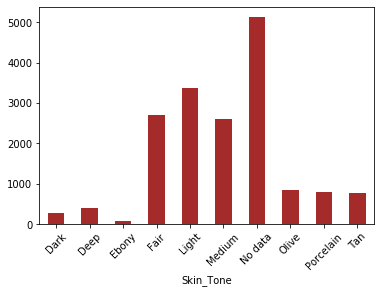

In [29]:
skintone_stats = udf.groupby('Skin_Tone')['Username'].count()
skintone_stats.plot.bar(color = 'brown', rot=45)

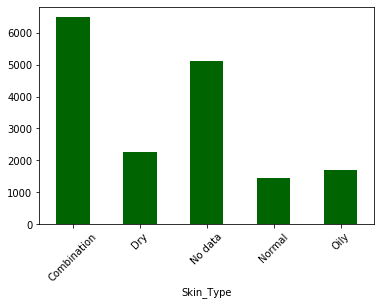

In [32]:
skintype_stats = udf.groupby('Skin_Type')['Username'].count()
skintype_stats.plot.bar(color = 'darkgreen', rot=45)

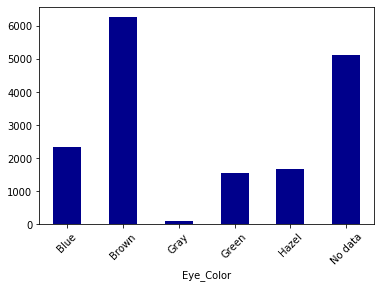

In [33]:
eyecolor_stats = udf.groupby('Eye_Color')['Username'].count()
eyecolor_stats.plot.bar(color = 'darkblue', rot=45)

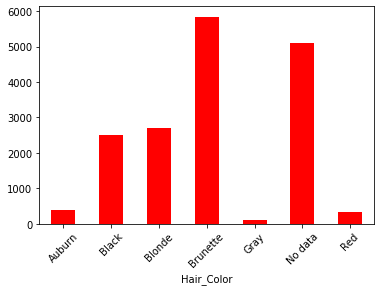

In [34]:
haircolor_stats = udf.groupby('Hair_Color')['Username'].count()
haircolor_stats.plot.bar(color = 'red', rot=45)

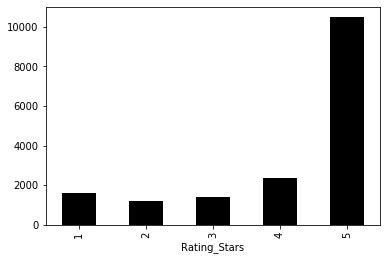

In [45]:
rating_stats = udf.groupby('Rating_Stars')['Username'].count()
rating_stats.plot.bar(color = 'black')

# Fun :)

In [46]:
import markovify
import string
import re

In [47]:
def no_punct(string):
    no_punct_string = re.sub(r'[^\w\s]', '', string)
    return no_punct_string

In [48]:
no_punct(udf.Review[1])

'Unfortunately this doesnt work for everyone I used it once and woke up the nxt day with 5 pimples used it again and again and again but woke up with more and more Finally i couldnt take it anymore I stopped using it went back to my cerave hydrating cleanser and Bam My skin was clearing up every day after that I suggest getting the small bottle to try it out first Remember everyones skin is very different\nread more'

In [52]:
udf.dropna(inplace=True)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
udf['Review'] = udf.apply(lambda row: no_punct(row['Review']), axis=1)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [90]:
pdf['Ingredients'] = pdf.apply(lambda row: no_punct(row['Ingredients']), axis=1)

In [91]:
text_model_i = markovify.NewlineText(pdf.Ingredients, state_size = 2)

In [92]:
for i in range(5):
    print(text_model_i.make_sentence())

Water Glycerin Glyceryl Caprylate Dipalmitoyl Hydroxyproline Caffeine Glucose CaprylicCapric Triglyceride Glycerin Sodium polyacrylate Butylene glycol Hydrolyzed Collagen Sodium Benzoate Bht Evodia Rutaecarpa Extract Titanium Dioxide Ci 77891
SD Alcohol 40B Alcohol Denat BisPeg18 Methyl Ether Dimethicone Polyacrylamide Aminomethyl Propanol C1314 Isoparaffin Foeniculum Vulgare Fennel Seed Extract Rubus Idaeus Raspberry Leaf Extract Vitis Vinifera Grape Seed Extract Rye Seed Extract Rosa Damascena Flower Oil Boswellia Carterii Oil Citrus Limon Lemon Fruit Extract Simmondsia Chinensis Jojoba Seed Oil Heptyl Undecylenate Argan Oil Isostearyl Neopentanoate Polybutene Cucumis Melo Cantalupensis Fruit Extract Flavor Fragaria Vesca Strawberry Fruit Extract Saccharomyces Cerevisiae Extract Buddleja Davidii Meristem Cell Culture Extract Hydrolyzed Vegetable Protein Sodium Hydroxide
Water Dipropylene Glycol Sodium Acrylates Copolymer C1314 Isoparaffin Tocopheryl Acetate Lavandula Angustifolia Lav

In [54]:
text_model = markovify.NewlineText(udf.Review, state_size = 2)

In [55]:
for i in range(5):
    print(text_model.make_sentence())

Before using it during the day my skin glowing in the morning for months I will start with what I would turn to when I run out of my MUSTHAVES
I wanted to give this a try The dark soap is my new perfume was but it definitely didnt disappoint my skin gets dry and I will definitely not worth it
I have used too When I saw that this serum in the texture is like a liquid remover then lather this into my skin is on the expensive side to remove my makeup off with sunscreen it feels super soft But after some time to find a turmeric serum or an essence to the surface layer of product I received a sample with my latest VoxBox from Influenster and will continue to use this as a follow up with my dark spot or acne prone skin friends
I have used this my skin a glowing appearance but it has helped reduce breakouts and this product complimentary for testing purposes from Influenster but Im so happy its only momentary Great for my 40 year old daughter the tarts winter skin that is also as expected I u

In [56]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

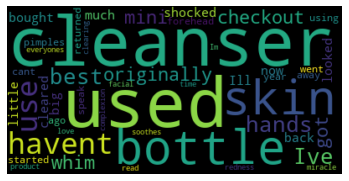

In [59]:
text = udf.Review[0]

wordcloud = WordCloud().generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [60]:
text = " ".join(word for word in udf.Review)

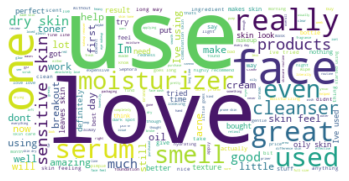

In [68]:
stopwords = set(STOPWORDS)
stopwords.update(['read', 'more', 'product'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [62]:
negative_df = udf[udf.Rating_Stars <= 3]
negative_df

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url
1,PatTea,Medium,Combination,Brown,Red,1,Unfortunately this doesnt work for everyone I ...,https://www.sephora.com/product/kale-spinach-g...
5,TABrown,No data,No data,No data,No data,2,There is nothing great about this cleanser I g...,https://www.sephora.com/product/kale-spinach-g...
6,britcorm,Porcelain,Oily,Blue,Brunette,1,Been trying this cleanser for about 3 weeks no...,https://www.sephora.com/product/kale-spinach-g...
20,Vani241,Olive,Oily,Brown,Black,3,There are Pros and Cons to this cleanser This ...,https://www.sephora.com/product/kale-spinach-g...
24,samanthapotter,No data,No data,No data,No data,1,I was so excited to begin delving deep into Th...,https://www.sephora.com/product/the-ordinary-d...
...,...,...,...,...,...,...,...,...
16987,SMToronto,Medium,Combination,Brown,Black,1,I bought the blue cartridge with hydrating jel...,https://www.sephora.com/product/clinique-id-yo...
16988,IZ95,No data,No data,No data,No data,2,I have oilysensitive skin and I didnt like any...,https://www.sephora.com/product/clinique-id-yo...
16990,giovannaoki,Light,Combination,Hazel,Brunette,3,It doesnt suck but it doesnt hydrate still lea...,https://www.sephora.com/product/clinique-id-yo...
16993,mmh02,Fair,Combination,Blue,Blonde,3,Ive been using this product for a few weeks no...,https://www.sephora.com/product/clinique-id-yo...


In [63]:
positive_df = udf[udf.Rating_Stars > 3]
positive_df

,Username,Skin_Tone,Skin_Type,Eye_Color,Hair_Color,Rating_Stars,Review,Product_Url
0,allyp3,Medium,Combination,Brown,Brunette,5,This is hands down the best cleanser Ive ever ...,https://www.sephora.com/product/kale-spinach-g...
2,Sabi1991,No data,No data,No data,No data,5,My favorite cleanser i love the packaging on t...,https://www.sephora.com/product/kale-spinach-g...
3,happyface2,Fair,Dry,Blue,Blonde,5,I love all things Youth To The People This cle...,https://www.sephora.com/product/kale-spinach-g...
4,kimkix34,Fair,Normal,Green,Blonde,5,I had a trial size of this and was obsessed My...,https://www.sephora.com/product/kale-spinach-g...
7,jenn887,Tan,Dry,Brown,Black,5,loveeeeeee this cleanser Leaves my skin smooth...,https://www.sephora.com/product/kale-spinach-g...
...,...,...,...,...,...,...,...,...
16996,pigbananas,Fair,Combination,Brown,Black,5,I LOVE THIS TO DEATH My review is a bit length...,https://www.sephora.com/product/clinique-id-yo...
16997,Anthiya,Olive,Combination,Brown,Black,4,This product did work for my skin but I found ...,https://www.sephora.com/product/clinique-id-yo...
16998,RaquelR16,Fair,Combination,Brown,Brunette,5,This worked so fast to heal my skin after anot...,https://www.sephora.com/product/clinique-id-yo...
16999,JacquelineRuby,Porcelain,Oily,Green,Blonde,5,This is AMAZING The jelly and the blue cartrid...,https://www.sephora.com/product/clinique-id-yo...


In [66]:
negative = " ".join(review for review in negative_df.Review)
positive = " ".join(review for review in positive_df.Review)

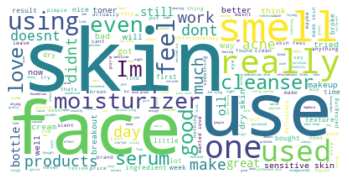

In [69]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

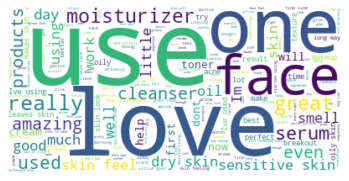

In [70]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [73]:
pdf = pd.read_csv('/Users/agorina/Desktop/Final/products_skincare_cleaned.csv')
pdf.head()

,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1


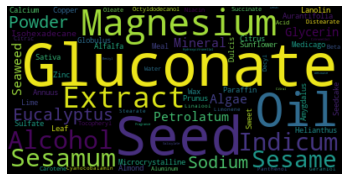

In [74]:
text_i = pdf.Ingredients[0]

wordcloud = WordCloud().generate(text_i)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [75]:
text_i = " ".join(word for word in pdf.Ingredients)

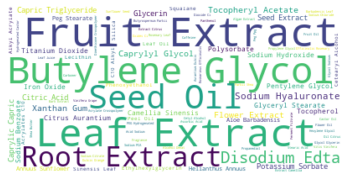

In [76]:
stopwords = set(STOPWORDS)
stopwords.update(['water'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_i)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [77]:
pdf.Category.value_counts()

Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: Category, dtype: int64

In [78]:
moist_df = pdf[pdf.Category == 'Moisturizer']
cleanse_df = pdf[pdf.Category == 'Cleanser']
mask_df = pdf[pdf.Category == 'Face Mask']
treat_df = pdf[pdf.Category == 'Treatment']
eye_df = pdf[pdf.Category == 'Eye cream']
sun_df = pdf[pdf.Category == 'Sun protect']

In [79]:
moist = " ".join(ing for ing in moist_df.Ingredients)
cleanse = " ".join(ing for ing in cleanse_df.Ingredients)
mask = " ".join(ing for ing in mask_df.Ingredients)
treat = " ".join(ing for ing in treat_df.Ingredients)
eye = " ".join(ing for ing in eye_df.Ingredients)
sun = " ".join(ing for ing in sun_df.Ingredients)

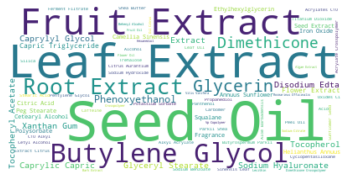

In [80]:
stopwords = set(STOPWORDS)
stopwords.update(['water'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(moist)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

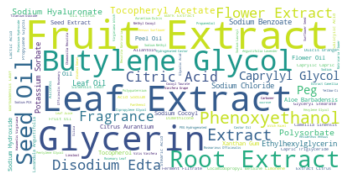

In [81]:
stopwords = set(STOPWORDS)
stopwords.update(['water'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(cleanse)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

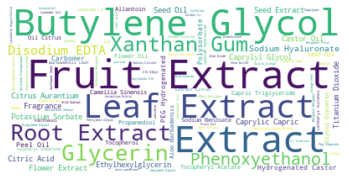

In [82]:
stopwords = set(STOPWORDS)
stopwords.update(['water'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(mask)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

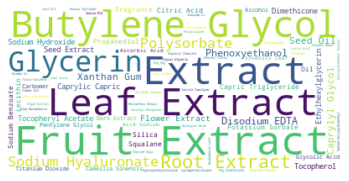

In [83]:
stopwords = set(STOPWORDS)
stopwords.update(['water'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(treat)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

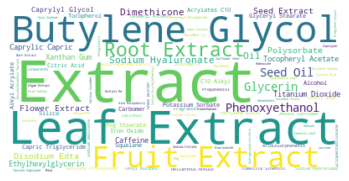

In [84]:
stopwords = set(STOPWORDS)
stopwords.update(['water'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(eye)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

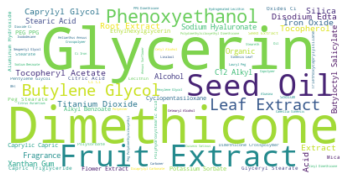

In [89]:
stopwords = set(STOPWORDS)
stopwords.update(['water'])

wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(sun)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [2]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer 

In [96]:
pdf.head()

,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Algae Seaweed Extract Mineral Oil Petrolatum G...,1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,Galactomyces Ferment Filtrate Pitera Butylene ...,1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,Water Dicaprylyl Carbonate Glycerin Cetearyl A...,1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,Algae Seaweed Extract Cyclopentasiloxane Petro...,1,1,1,1,1
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,Water Snail Secretion Filtrate Phenyl Trimethi...,1,1,1,1,1


In [101]:
pdf.Ingredients[0]

'Algae Seaweed Extract Mineral Oil Petrolatum Glycerin Isohexadecane Microcrystalline Wax Lanolin Alcohol Citrus Aurantifolia Lime Extract Sesamum Indicum Sesame Seed Oil Eucalyptus Globulus Eucalyptus Leaf Oil Sesamum Indicum Sesame Seed Powder Medicago Sativa Alfalfa Seed Powder Helianthus Annuus Sunflower Seedcake Prunus Amygdalus Dulcis Sweet Almond Seed Meal Sodium Gluconate Copper Gluconate Calcium Gluconate Magnesium Gluconate Zinc Gluconate Magnesium Sulfate Paraffin Tocopheryl Succinate Niacin Water BetaCarotene Decyl Oleate Aluminum Distearate Octyldodecanol Citric Acid Cyanocobalamin Magnesium Stearate Panthenol Limonene Geraniol Linalool Hydroxycitronellal Citronellol Benzyl Salicylate Citral Sodium Benzoate Alcohol Denat Fragrance'

In [105]:
def clean_strings(string):
    #tokenize
    tokenizer = RegexpTokenizer(r'[a-zA-Z]+')
    tokenized_string = tokenizer.tokenize(string)
    
    #lower
    lowered_string = [word.lower() for word in tokenized_string]
    
    #lemmatization
    lemmatizer = WordNetLemmatizer() 
    lemmatized_string = [lemmatizer.lemmatize(word) for word in lowered_string]
    
    #filter stop words
    stop_words=set(stopwords.words("english"))
    filtered_string = [word for word in lemmatized_string if word not in stop_words]
   
    #remove custom stop words
    custom_stop_words = ['water', 'aqua', 'eau']
    cleaned_string = [word for word in filtered_string if word not in custom_stop_words]
    
    return cleaned_string

In [106]:
pdf['Ingredients_List'] = pdf.apply(lambda row: clean_strings(row['Ingredients']), axis=1)
pdf.head()

,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Ingredients_List
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Algae Seaweed Extract Mineral Oil Petrolatum G...,1,1,1,1,1,"[algae, seaweed, extract, mineral, oil, petrol..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,Galactomyces Ferment Filtrate Pitera Butylene ...,1,1,1,1,1,"[galactomyces, ferment, filtrate, pitera, buty..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,Water Dicaprylyl Carbonate Glycerin Cetearyl A...,1,1,1,1,0,"[dicaprylyl, carbonate, glycerin, cetearyl, al..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,Algae Seaweed Extract Cyclopentasiloxane Petro...,1,1,1,1,1,"[algae, seaweed, extract, cyclopentasiloxane, ..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,Water Snail Secretion Filtrate Phenyl Trimethi...,1,1,1,1,1,"[snail, secretion, filtrate, phenyl, trimethic..."


In [3]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

In [116]:
X = pdf.Ingredients
y = pdf.Category
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42)

In [117]:
y.value_counts()

Moisturizer    298
Cleanser       281
Face Mask      266
Treatment      248
Eye cream      209
Sun protect    170
Name: Category, dtype: int64

In [118]:
categories = ['Moisturizer', 'Cleanser', 'Face Mask', 'Treatment', 'Eye cream', 'Sun protect']

In [119]:
#Naive Bayes
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.39402173913043476
              precision    recall  f1-score   support

 Moisturizer       0.66      0.51      0.57        77
    Cleanser       0.00      0.00      0.00        59
   Face Mask       0.50      0.47      0.48        68
   Treatment       0.26      0.77      0.39        70
   Eye cream       1.00      0.16      0.27        38
 Sun protect       0.40      0.25      0.31        56

    accuracy                           0.39       368
   macro avg       0.47      0.36      0.34       368
weighted avg       0.45      0.39      0.36       368



/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [120]:
#Logistic Regression
logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression(n_jobs=1, C=1e5)),
               ])
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.483695652173913
              precision    recall  f1-score   support

 Moisturizer       0.61      0.60      0.60        77
    Cleanser       0.48      0.49      0.49        59
   Face Mask       0.56      0.50      0.53        68
   Treatment       0.35      0.30      0.32        70
   Eye cream       0.59      0.61      0.60        38
 Sun protect       0.35      0.45      0.39        56

    accuracy                           0.48       368
   macro avg       0.49      0.49      0.49       368
weighted avg       0.49      0.48      0.48       368



In [121]:
#SVG with SGD
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=categories))

accuracy 0.49184782608695654
              precision    recall  f1-score   support

 Moisturizer       0.61      0.60      0.60        77
    Cleanser       0.55      0.44      0.49        59
   Face Mask       0.49      0.53      0.51        68
   Treatment       0.32      0.31      0.32        70
   Eye cream       0.62      0.74      0.67        38
 Sun protect       0.40      0.41      0.40        56

    accuracy                           0.49       368
   macro avg       0.50      0.50      0.50       368
weighted avg       0.49      0.49      0.49       368



In [122]:
ppdf = pdf[(pdf.Category != 'Face Mask') & (pdf.Category != 'Treatment') & (pdf.Category != 'Eye cream') & (pdf.Category != 'Sun protect')]

In [124]:
ppdf.head()

,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Ingredients_List
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Algae Seaweed Extract Mineral Oil Petrolatum G...,1,1,1,1,1,"[algae, seaweed, extract, mineral, oil, petrol..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,Galactomyces Ferment Filtrate Pitera Butylene ...,1,1,1,1,1,"[galactomyces, ferment, filtrate, pitera, buty..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,Water Dicaprylyl Carbonate Glycerin Cetearyl A...,1,1,1,1,0,"[dicaprylyl, carbonate, glycerin, cetearyl, al..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,Algae Seaweed Extract Cyclopentasiloxane Petro...,1,1,1,1,1,"[algae, seaweed, extract, cyclopentasiloxane, ..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,Water Snail Secretion Filtrate Phenyl Trimethi...,1,1,1,1,1,"[snail, secretion, filtrate, phenyl, trimethic..."


In [125]:
two_categories = ['Moisturizer', 'Cleanser']

In [126]:
X_ = ppdf.Ingredients
y_ = ppdf.Category
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.25, random_state = 42)

In [127]:
sgd = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None))])
sgd.fit(X_train_, y_train_)

y_pred_ = sgd.predict(X_test_)

print('accuracy %s' % accuracy_score(y_pred_, y_test_))
print(classification_report(y_test_, y_pred_, target_names=two_categories))

accuracy 0.8413793103448276
              precision    recall  f1-score   support

 Moisturizer       0.82      0.81      0.81        62
    Cleanser       0.86      0.87      0.86        83

    accuracy                           0.84       145
   macro avg       0.84      0.84      0.84       145
weighted avg       0.84      0.84      0.84       145



In [128]:
nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train_, y_train_)

y_pred_ = nb.predict(X_test_)

print('accuracy %s' % accuracy_score(y_pred_, y_test_))
print(classification_report(y_test_, y_pred_, target_names=two_categories))

accuracy 0.8275862068965517
              precision    recall  f1-score   support

 Moisturizer       0.80      0.79      0.80        62
    Cleanser       0.85      0.86      0.85        83

    accuracy                           0.83       145
   macro avg       0.82      0.82      0.82       145
weighted avg       0.83      0.83      0.83       145



# Latent Dirichlet Allocation

In [129]:
from __future__ import print_function


In [132]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping


In [135]:
ing_raw = pdf.Ingredients

In [136]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(ing_raw)
print(dtm_tf.shape)


(1472, 1088)


In [137]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(ing_raw)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [140]:
lda_tf = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=6, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=6, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [141]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5      0.073731  0.060949       1        1  20.534841
1      0.057474  0.052536       2        1  19.180374
3      0.168138  0.059985       3        1  17.831254
4     -0.208340 -0.044383       4        1  17.617275
2      0.070760 -0.205258       5        1  16.292693
0     -0.161763  0.076171       6        1   8.543563, topic_info=    Category         Freq         Term        Total  loglift  logprob
398  Default   765.000000       flower   765.000000  30.0000  30.0000
237  Default   552.000000       citrus   552.000000  29.0000  29.0000
320  Default   864.000000  dimethicone   864.000000  28.0000  28.0000
407  Default  1189.000000        fruit  1189.000000  27.0000  27.0000
563  Default  1242.000000         leaf  1242.000000  26.0000  26.0000
..       ...          ...          ...          ...      ...      ...
715   Topic6    41.502858  officinalis   363.155227   0.2909  -5.0287
818   Topic6    39.411828  polysorbate   396.398784   0.1516  -5.0804
826   Topic6    36.644292       powder   228.078096   0.6316  -5.1532
824   Topic6    37.186786    potassium   546.900329  -0.2283  -5.1385
398   Topic6    35.271763       flower   765.257109  -0.6171  -5.1914

[426 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
2         4  0.974893     acer
4         1  0.213821  acetate
4         2  0.211571  acetate
4         3  0.279093  acetate
4         4  0.056269  acetate
...     ...       ...      ...
1083      1  0.107959    yeast
1083      2  0.374257    yeast
1083      3  0.014394    yeast
1083      5  0.496610    yeast
1083      6  0.014394    yeast

[970 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 4, 5, 3, 1])

In [144]:
review_raw = udf.Review

In [145]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(review_raw)
print(dtm_tf.shape)

(16908, 2903)


In [146]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(review_raw)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


In [148]:
lda_tf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=5, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [149]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6)}

In [152]:
import time

In [153]:
def LDA(raw_text, n_topics):
    tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
    dtm_tf = tf_vectorizer.fit_transform(raw_text)
    time.sleep(1)
    tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
    dtm_tfidf = tfidf_vectorizer.fit_transform(raw_text)
    time.sleep(1)
    lda_tf = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda_tf.fit(dtm_tf)
    lda_tfidf = LatentDirichletAllocation(n_components=n_topics, random_state=0)
    lda_tfidf.fit(dtm_tfidf)
    time.sleep(5)
    return pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

In [159]:
LDA(udf.Review[:100], 5)

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:1616: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  UserWarning)


TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker. The exit codes of the workers are {SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6), SIGABRT(-6)}

In [157]:
type(udf.Review[:1000])

pandas.core.series.Series

In [160]:
from sklearn.manifold import TSNE

In [169]:
cat = pdf.Category.unique().tolist()
sktype = pdf.columns[6:].tolist()

In [168]:
pdf.head()

,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive,Ingredients_List
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,Algae Seaweed Extract Mineral Oil Petrolatum G...,1,1,1,1,1,"[algae, seaweed, extract, mineral, oil, petrol..."
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,Galactomyces Ferment Filtrate Pitera Butylene ...,1,1,1,1,1,"[galactomyces, ferment, filtrate, pitera, buty..."
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,Water Dicaprylyl Carbonate Glycerin Cetearyl A...,1,1,1,1,0,"[dicaprylyl, carbonate, glycerin, cetearyl, al..."
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,Algae Seaweed Extract Cyclopentasiloxane Petro...,1,1,1,1,1,"[algae, seaweed, extract, cyclopentasiloxane, ..."
4,Moisturizer,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,Water Snail Secretion Filtrate Phenyl Trimethi...,1,1,1,1,1,"[snail, secretion, filtrate, phenyl, trimethic..."


In [172]:
def basic_recommendation(category, skintype):

    df = pdf[pdf["Category"] == category][pdf[skintype] == 1]
    df = df.reset_index()
    
    ingred_ids = {}
    corpus = []
    ids = 0
    
    for i in range(len(df)):
        ings = df['Ingredients'][i]
        ings = ings.lower()
        tokens = ings.split(', ')
        corpus.append(tokens)
        for ingredient in tokens:
            if ingredient not in ingred_ids:
                ingred_ids[ingredient] = ids
                ids += 1
                
    M=len(df)
    N=len(ingred_ids)
    A = np.zeros(shape=(M,N))
    
    def encoder(tokens):
        x = np.zeros(N)
        for t in tokens:
            ids = ingred_ids[t]
            x[ids] = 1
        return x
    
    i = 0
    for tokens in corpus:
        A[i, :] = encoder(tokens)
        i += 1
        
        
    mod = TSNE(n_components=2, learning_rate=200)
    features = mod.fit_transform(A)
    
    df["X"] = features[:,0]
    df["Y"] = features[:,1]
    
    return df

In [173]:
dfa = pd.DataFrame()
for c in cat:
    for s in sktype:
        te = basic_recommendation(c, s)
        te['Combinations'] = c + '_' + s
        dfa = pd.concat([dfa, te])

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3

ValueError: Found array with 0 sample(s) (shape=(0, 0)) while a minimum of 2 is required.

In [4]:
cosm_2 = pd.read_csv('/Users/agorina/Desktop/Final/products_skincare_cleaned.csv')

# All possible combinations for the option choices
option_1 = cosm_2.Category.unique().tolist()
option_2 = cosm_2.columns[6:].tolist()



In [5]:

## defining a function embedding ingredients and decomposition at once
def my_recommender(op_1, op_2):
    df = cosm_2[cosm_2['Category'] == op_1][cosm_2[op_2] == 1]
    df = df.reset_index()

    # embedding each ingredients
    ingredient_idx = {}
    corpus = []
    idx = 0

    for i in range(len(df)):
        ingreds = df['Ingredients'][i]
        ingreds = ingreds.lower()
        tokens = ingreds.split(', ')
        corpus.append(tokens)
        for ingredient in tokens:
            if ingredient not in ingredient_idx:
                ingredient_idx[ingredient] = idx
                idx += 1

    # Get the number of items and tokens
    M = len(df)                 # The number of the items
    N = len(ingredient_idx)     # The number of the ingredients

    # Initialize a matrix of zeros
    A = np.zeros(shape = (M, N))

    # Define the oh_encoder function
    def oh_encoder(tokens):
        x = np.zeros(N)
        for t in tokens:
            # Get the index for each ingredient
            idx = ingredient_idx[t]
            # Put 1 at the corresponding indices
            x[idx] = 1
        return x

    # Make a document-term matrix
    i = 0
    for tokens in corpus:
        A[i, :] = oh_encoder(tokens)
        i += 1

    # Dimension reduction with t-SNE
    model = TSNE(n_components = 2, learning_rate = 200)
    tsne_features = model.fit_transform(A)

    # Make X, Y columns
    df['X'] = tsne_features[:, 0]
    df['Y'] = tsne_features[:, 1]

    return df




In [177]:

# Create the dataframe for all combinations
df_all = pd.DataFrame()
for op_1 in option_1:
    for op_2 in option_2:
            temp = my_recommender(op_1, op_2)
            temp['Category'] = op_1 + '_' + op_2
            df_all = pd.concat([df_all, temp])

/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agorina/opt/anaconda3/lib/python3

In [178]:
df_all.to_csv('/Users/agorina/Desktop/Final/products_skincare_tsne.csv', encoding = 'utf-8-sig', index = False)

In [6]:
from sklearn.metrics.pairwise import cosine_similarity

from bokeh.io import show, curdoc, output_notebook, push_notebook
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool, Select, Paragraph, TextInput
from bokeh.layouts import widgetbox, column, row
from ipywidgets import interact

In [7]:
df = pd.read_csv('/Users/agorina/Desktop/Final/products_skincare_tsne.csv')
df.head()

,index,Category,Brand,Product,Price,Rating,Ingredients,Combination,Dry,Normal,Oily,Sensitive,X,Y
0,0,Moisturizer_Combination,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1,4.217473,-50.148650
1,1,Moisturizer_Combination,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1,-23.725231,8.216971
2,2,Moisturizer_Combination,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0,105.275810,13.920675
3,3,Moisturizer_Combination,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1,-92.571710,-14.919780
4,4,Moisturizer_Combination,IT COSMETICS,Your Skin But Better™ CC+™ Cream with SPF 50+,38,4.1,"Water, Snail Secretion Filtrate, Phenyl Trimet...",1,1,1,1,1,-81.394670,20.869390


In [181]:
df.Category.unique()

array(['Moisturizer_Combination', 'Moisturizer_Dry', 'Moisturizer_Normal',
       'Moisturizer_Oily', 'Moisturizer_Sensitive',
       'Cleanser_Combination', 'Cleanser_Dry', 'Cleanser_Normal',
       'Cleanser_Oily', 'Cleanser_Sensitive', 'Treatment_Combination',
       'Treatment_Dry', 'Treatment_Normal', 'Treatment_Oily',
       'Treatment_Sensitive', 'Face Mask_Combination', 'Face Mask_Dry',
       'Face Mask_Normal', 'Face Mask_Oily', 'Face Mask_Sensitive',
       'Eye cream_Combination', 'Eye cream_Dry', 'Eye cream_Normal',
       'Eye cream_Oily', 'Eye cream_Sensitive', 'Sun protect_Combination',
       'Sun protect_Dry', 'Sun protect_Normal', 'Sun protect_Oily',
       'Sun protect_Sensitive'], dtype=object)

In [8]:
Category = ['Moisturizer', 'Cleanser', 'Treatment', 'Face Mask', 'Eye cream', 'Sun protect']
Skintype = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']

In [9]:
output_notebook()

Loading BokehJS ...

In [10]:
source = ColumnDataSource(df)
plot = figure(x_axis_label = 'T-SNE 1', y_axis_label = 'T-SNE 2', 
              width = 500, height = 400)
plot.circle(x = 'X', y = 'Y', source = source, 
            size = 10, color = '#FF7373', alpha = .8)

plot.background_fill_color = "beige"
plot.background_fill_alpha = 0.2

# add hover tool
hover = HoverTool(tooltips = [
        ('Product', '@Product'),
        ('Brand', '@Brand'),
        ('Price', '$ @Price'),
        ('Rating', '@Rating')])
plot.add_tools(hover)

In [11]:
def update(Category = option_1[0], Skintype = option_2[0]):
    a_b = Category + '_' + Skintype
    new_data = {
        'X' : df[df['Category'] == a_b]['X'],
        'Y' : df[df['Category'] == a_b]['Y'],
        'Product' : df[df['Category'] == a_b]['Product'],
        'Brand' : df[df['Category'] == a_b]['Brand'],
        'Price' : df[df['Category'] == a_b]['Price'],
        'Rating' : df[df['Category'] == a_b]['Rating'],
    }
    source.data = new_data
    push_notebook()


In [12]:
output_notebook()

interact(update, Category = option_1, Skintype = option_2)
show(plot, notebook_handle = True)

Loading BokehJS ...

interactive(children=(Dropdown(description='Category', options=('Moisturizer', 'Cleanser', 'Treatment', 'Face …